### Quick look on how we can transform image data in PyTorch

In [1]:
import torch
import torchvision

from torchvision.transforms import v2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
import warnings

warnings.filterwarnings('ignore')

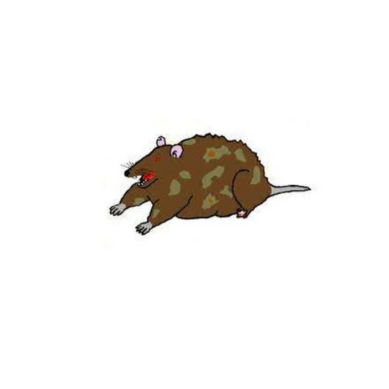

In [4]:
plt.axis('off')
plt.imshow(Image.open('img.jpg'))

In [5]:
# look on image
img = np.array(Image.open('img.jpg'))
print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'numpy.ndarray'>
(640, 640, 3)
uint8
min = 0, max = 255


#### Let's convert image into tensor!

In [6]:
transform = v2.ToTensor()
img_ToTensor = transform(img)

print(type(img_ToTensor))
print(img_ToTensor.shape)
print(img_ToTensor.dtype)
print(f'min = {img_ToTensor.min()}, max = {img_ToTensor.max()}')

<class 'torch.Tensor'>
torch.Size([3, 640, 640])
torch.float32
min = 0.0, max = 1.0


#### And look on intresting mistake

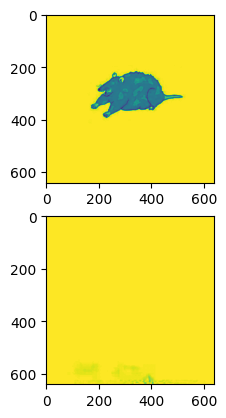

In [7]:
# wrong attempt to move dim with color channels
# reshape only change shape!
img_c2 = img
img_c0 = img.reshape([3, 640, 640])

_, ax = plt.subplots(2, 1)

ax[0].imshow(img_c2[..., 0])
ax[1].imshow(img_c0[0, ...])
# have a wrong representation of image as a result!

#### Change dtype of our tensor!

In [8]:
transform = v2.ToDtype(torch.float32, scale=True)
img_dtype_v2 = transform(img_ToTensor)

print(type(img_dtype_v2))
print(img_dtype_v2.shape)
print(img_dtype_v2.dtype)
print(f'min = {img_dtype_v2.min()}, max = {img_dtype_v2.max()}')

<class 'torch.Tensor'>
torch.Size([3, 640, 640])
torch.float32
min = 0.0, max = 1.0


#### Normalize our data!

In [9]:
transform = v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm_v2 = transform(img_dtype_v2)

print(type(img_norm_v2))
print(img_norm_v2.shape)
print(img_norm_v2.dtype)
print(f'min = {img_norm_v2.min()}, max = {img_norm_v2.max()}')

<class 'torch.Tensor'>
torch.Size([3, 640, 640])
torch.float32
min = -1.0, max = 1.0


#### Apply all transformations!

In [10]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('img.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 640, 640])
torch.float32
min = -1.0, max = 1.0


In [ ]:
# optimal pipeline of transformations in V2
"""
        transform = v2.Compose(
            [
                v2.ToImage(),
                v2.ToDtype(torch.uint8, scale=True),
                
                -- Добавляем различные преобразования --
                
                v2.ToDtype(torch.float32, scale=True),
                v2.Normalize(mean=(0.5, ), std=(0.5, ))
            ]
        )
"""

#### Write down our own transformation!

In [11]:
class MyTransform(torch.nn.Module):
    # here we write our transformation logic
    def forward(self, sample):
        pass

In [12]:
# example
class MyNormalize(torch.nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        self.mean = mean
        self.std = std

    def forward(self, sample):
        sample = (sample - self.mean) / self.std
        return sample

#### Compare!

In [13]:
transform_1 = v2.Compose(
    [
        v2.ToTensor(),
        v2.Normalize(mean=(0.5, ), std=(0.5, ))
    ]
)

transform_2 = v2.Compose(
    [
        v2.ToTensor(),
        v2.ToDtype(torch.float32, scale=True),
        MyNormalize(0.5, 0.5)
    ]
)

In [14]:
img = Image.open('img.jpg')

In [15]:
img_1 = transform_1(img)

print('Img:')
print(f'    {type(img_1)}')
print(f'    {img_1.shape}')
print(f'    {img_1.dtype}')
print(f'    min = {img_1.min()}, max = {img_1.max()}')

Img:
    <class 'torch.Tensor'>
    torch.Size([3, 640, 640])
    torch.float32
    min = -1.0, max = 1.0


In [16]:
img_2 = transform_2(img)

print('Img:')
print(f'    {type(img_2)}')
print(f'    {img_2.shape}')
print(f'    {img_2.dtype}')
print(f'    min = {img_2.min()}, max = {img_2.max()}')

Img:
    <class 'torch.Tensor'>
    torch.Size([3, 640, 640])
    torch.float32
    min = -1.0, max = 1.0


In [17]:
torch.equal(img_1, img_2)

True